In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)
formatter = ticker.ScalarFormatter(useMathText=True)

In [2]:
manila = pd.read_csv('manila_baseline/measures.csv')
our = pd.read_csv('our_approach/measures.csv')

In [3]:
manila_time = pd.read_fwf('manila_baseline/times.txt', header=None)
manila["time"] = manila_time

In [4]:
our_time = pd.read_fwf('our_approach/times.txt', header=None)
our['time'] = our_time

In [5]:
manila['approach'] = 'Manila'
our['approach'] = 'Our approach'

In [6]:
full = pd.concat([manila, our])

In [7]:
full

,label,timestamp,duration,pkg,dram,socket,time,approach
0,bar,1.707840e+09,1.214451e+05,6520369.0,84411.0,0,0.121442,Manila
1,bar,1.707840e+09,3.250898e+05,17110430.0,119873.0,0,0.325086,Manila
2,bar,1.707840e+09,1.188136e+05,9132728.0,97107.0,0,0.118810,Manila
3,bar,1.707840e+09,1.343168e+07,597980525.0,28814685.0,0,13.431675,Manila
4,bar,1.707840e+09,1.363832e+05,4138539.0,101990.0,0,0.136380,Manila
...,...,...,...,...,...,...,...,...
335,bar,1.707839e+09,2.250140e+04,790037.0,33386.0,0,0.022403,Our approach
336,bar,1.707839e+09,1.544831e+04,241089.0,11780.0,0,0.015065,Our approach
337,bar,1.707839e+09,1.729812e+04,796995.0,31311.0,0,0.015291,Our approach
338,bar,1.707839e+09,1.078242e+05,2090754.0,110839.0,0,0.103086,Our approach


## CPU Consumption

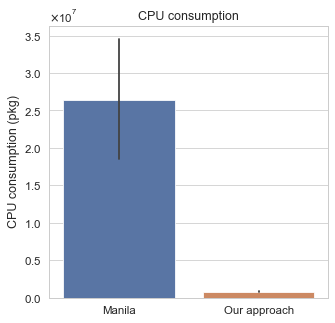

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x='approach', y='pkg', hue='approach', ax=ax)
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.title('CPU consumption')
plt.savefig('pkg.png', dpi=300, bbox_inches='tight')
plt.show()

## Execution time

In [35]:
full

,label,timestamp,duration,pkg,dram,socket,time,approach
0,bar,1.707840e+09,1.214451e+05,6520369.0,84411.0,0,0.121442,Manila
1,bar,1.707840e+09,3.250898e+05,17110430.0,119873.0,0,0.325086,Manila
2,bar,1.707840e+09,1.188136e+05,9132728.0,97107.0,0,0.118810,Manila
3,bar,1.707840e+09,1.343168e+07,597980525.0,28814685.0,0,13.431675,Manila
4,bar,1.707840e+09,1.363832e+05,4138539.0,101990.0,0,0.136380,Manila
...,...,...,...,...,...,...,...,...
1035,bar,1.707842e+09,2.240506e+04,405028.0,30274.0,0,NaN,Our approach
1036,bar,1.707842e+09,1.506701e+04,668944.0,12512.0,0,NaN,Our approach
1037,bar,1.707842e+09,1.529344e+04,729063.0,31311.0,0,NaN,Our approach
1038,bar,1.707842e+09,1.030882e+05,2280085.0,107177.0,0,NaN,Our approach


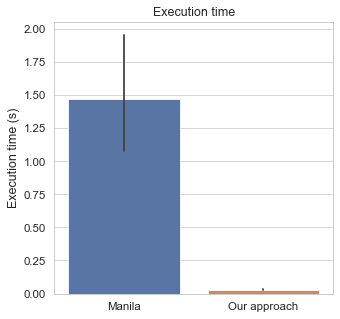

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()